## Discretization

[Feature Engineering for Machine Learning Course](https://www.trainindata.com/p/feature-engineering-for-machine-learning)

Discretization is the process of transforming continuous variables into discrete variables by creating a set of contiguous intervals that span the range of the variable's values. Discretization is also called **binning**, where bin is an alternative name for interval.


### Discretization helps handle outliers and may improve the value spread in skewed variables

Discretization helps handle outliers by placing these values into the lower or higher intervals, together with the remaining inlier values of the distribution. Thus, these outlier observations no longer differ from the rest of the values at the tails of the distribution, as they are now all together in the same interval / bucket. In addition, by creating appropriate bins or intervals, discretization can help spread the values of a skewed variable across a set of bins with an equal number of observations.


### Discretization approaches

There are several approaches to transforming continuous variables into discrete ones. Discretization methods fall into 2 categories: **supervised and unsupervised**. Unsupervised methods do not use any information, other than the variable distribution, to create the contiguous bins in which the values will be placed. Supervised methods typically use target information in order to create the bins or intervals.


####  Unsupervised discretization methods

- Equal width discretisation
- Equal frequency discretization
- K-means discretization

#### Supervised discretization methods

- Discretization using decision trees


In this lecture, I will describe **equal frequency discretization.


## Equal frequency discretization

Equal frequency discretization divides the scope of possible values of the variable into N bins, where each bin carries the same amount of observations. This is particularly useful for skewed variables, as it spreads the observations over the different bins equally. We find the interval boundaries by determining the quantiles.

Equal frequency discretization using quantiles consists of dividing the continuous variable into N quantiles, where N to be defined by the user.

Equal frequency binning is straightforward to implement, and by spreading the values of the observations more evenly, it may help boost the algorithm's performance. This arbitrary binning may also disrupt the relationship with the target.

## Titanic dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from feature_engine.discretisation import EqualFrequencyDiscretiser

In [2]:
# load the numerical variables of the Titanic Dataset

data = pd.read_csv('../../Datasets/titanic.csv',
                   usecols=['age', 'fare', 'survived'])

data.head()

,survived,age,fare
0,1,29.0000,211.3375
1,1,0.9167,151.5500
2,0,2.0000,151.5500
3,0,30.0000,151.5500
4,0,25.0000,151.5500


In [3]:
# Let's separate into train and test set

X_train, X_test, y_train, y_test = train_test_split(
    data[['age', 'fare']],
    data['survived'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((916, 2), (393, 2))

The variables Age and Fare contain missing data, that I will fill by extracting a random sample of the variable.

In [4]:
def impute_na(data, variable):
    # function to fill NA with a random sample

    df = data.copy()

    # random sampling
    df[variable+'_random'] = df[variable]

    # extract the random sample to fill the na
    random_sample = X_train[variable].dropna().sample(
        df[variable].isnull().sum(), random_state=0)

    # pandas needs to have the same index in order to merge datasets
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(), variable+'_random'] = random_sample

    return df[variable+'_random']

In [5]:
# replace NA in both train and test sets

X_train['age'] = impute_na(X_train, 'age')
X_test['age'] = impute_na(X_test, 'age')

X_train['fare'] = impute_na(X_train, 'fare')
X_test['fare'] = impute_na(X_test, 'fare')

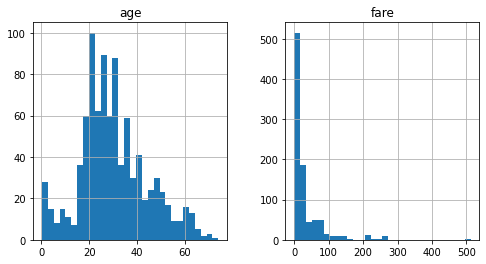

In [6]:
# let's explore the distribution of age

X_train[['age', 'fare']].hist(bins=30, figsize=(8,4))
plt.show()

## Equal frequency discretization with Feature-Engine

In [7]:
# with feature engine we can automate the process for many variables
# in one line of code

disc = EqualFrequencyDiscretiser(
    q=10,
    variables = ['age', 'fare'],
    return_boundaries=True,
)

disc.fit(X_train)

EqualFrequencyDiscretiser(return_boundaries=True, variables=['age', 'fare'])

In [8]:
# in the binner dict, we can see the limits of the intervals. Note
# that the intervals have different widths

disc.binner_dict_

{'age': [-inf, 16.0, 20.0, 22.0, 25.0, 28.0, 31.0, 36.0, 42.0, 50.0, inf],
 'fare': [-inf,
  7.55,
  7.7958,
  8.05,
  10.5,
  14.4542,
  21.075,
  26.55,
  40.125,
  79.025,
  inf]}

In [9]:
# transform train and text

train_t = disc.transform(X_train)
test_t = disc.transform(X_test)

In [10]:
train_t.head()

,age,fare
501,"(-inf, 16.0]","(14.454, 21.075]"
588,"(-inf, 16.0]","(21.075, 26.55]"
402,"(28.0, 31.0]","(10.5, 14.454]"
1193,"(36.0, 42.0]","(7.55, 7.796]"
686,"(20.0, 22.0]","(7.55, 7.796]"


Text(0, 0.5, 'Number of observations per bin')

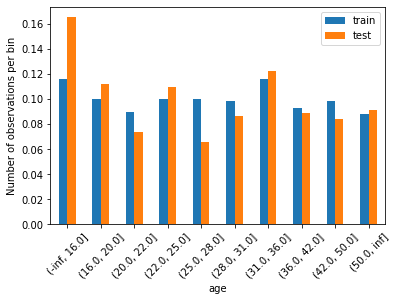

In [11]:
# and now let's explore the number of observations per bucket

t1 = train_t['age'].value_counts(normalize=True).sort_index()
t2 = test_t['age'].value_counts(normalize=True).sort_index()

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']
tmp.plot.bar()
plt.xticks(rotation=45)
plt.ylabel('Number of observations per bin')

Text(0, 0.5, 'Number of observations per bin')

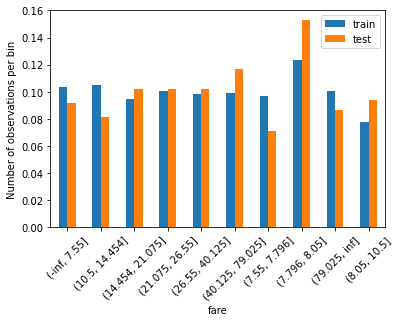

In [12]:
t1 = train_t['fare'].value_counts(normalize=True).sort_index()
t2 = test_t['fare'].value_counts(normalize=True).sort_index()

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']
tmp.plot.bar()
plt.xticks(rotation=45)
plt.ylabel('Number of observations per bin')

Note how equal frequency discretization obtains a better value spread across the different intervals.